In [1]:
import pandas as pd
import numpy as np
import pickle
import re
from nltk.stem import WordNetLemmatizer 

#import sys/
#!conda install --yes --prefix {sys.prefix} anaconda bcolz 
import bcolz

START_TOKEN = '<START>'
END_TOKEN = '<END>'

In [4]:
pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv",parse_dates=[0],index_col=0)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'S

In [5]:
"""def read_data():
    data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv",parse_dates=[0],index_col=0)
    dfs = []
    for i in range(1,25):
        col = "Top"+str(i)
        _df = data[[col, 'Label']]
        _df.columns = ['News', 'Label']
        dfs.append(_df)
    result = pd.concat(dfs,ignore_index=True)
    result = result.dropna()
    return result

def process_news(news):
    _news = re.sub('^b', "", news)
    _news = _news.lower()
    _news = re.sub("[^a-zA-Z]", " ",_news)
    _news = re.sub('[\s]+', ' ', _news)
    
    _news = _news.split(" ")
    if "" in _news:
        _news.remove("")
    
    lemmatizer = WordNetLemmatizer() 
    
    _news = [START_TOKEN] + [lemmatizer.lemmatize(w) for w in _news] + [END_TOKEN]
     
    return _news

def read_data():

    data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv")
    
    dfs = []
    for i in range(1,25):
        col = "Top"+str(i)
        _df = data[[col, 'Label']]
        _df.columns = ['News', 'Label']
        dfs.append(_df)
    data = pd.concat(dfs,ignore_index=True)
    data = data.dropna()
    data['Tokens'] = data['News'].map(process_news)
    
    Xy_train = data[:int(len(data)*0.8)]
    Xy_test = data[int(len(data)*0.8):]
    
    return data, Xy_train, Xy_test"""

'def read_data():\n    data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv",parse_dates=[0],index_col=0)\n    dfs = []\n    for i in range(1,25):\n        col = "Top"+str(i)\n        _df = data[[col, \'Label\']]\n        _df.columns = [\'News\', \'Label\']\n        dfs.append(_df)\n    result = pd.concat(dfs,ignore_index=True)\n    result = result.dropna()\n    return result\n\ndef process_news(news):\n    _news = re.sub(\'^b\', "", news)\n    _news = _news.lower()\n    _news = re.sub("[^a-zA-Z]", " ",_news)\n    _news = re.sub(\'[\\s]+\', \' \', _news)\n    \n    _news = _news.split(" ")\n    if "" in _news:\n        _news.remove("")\n    \n    lemmatizer = WordNetLemmatizer() \n    \n    _news = [START_TOKEN] + [lemmatizer.lemmatize(w) for w in _news] + [END_TOKEN]\n     \n    return _news\n\ndef read_data():\n\n    data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv")\n    \n    dfs = []\n    for i in range(1,25):\n        col = "Top"+str(i)\n        _df = data[[col,

In [2]:
def process_news(news):
    _news = news.replace('b\"', "")
    _news = _news.replace('b\'', "")
    _news = _news.lower()
    _news = re.sub("[^a-zA-Z]", " ",_news)
    _news = re.sub('[\s]+', ' ', _news)
    
    _news = _news.split(" ")
    if "" in _news:
        _news.remove("")
    
    #lemmatizer = WordNetLemmatizer() 
    
    #_news = [lemmatizer.lemmatize(w) for w in _news]
    
    _news = ' '.join(_news)
     
    return _news

def read_data():

    data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv")
    
    dfs = []
    for i in range(1,25):
        col = "Top"+str(i)
        _df = data[[col, 'Label']]
        _df.columns = ['News', 'Label']
        dfs.append(_df)
    data = pd.concat(dfs,ignore_index=True)
    data = data.dropna()
    data['Tokens'] = data['News'].map(process_news)
    
    Xy_train = data[:int(len(data)*0.8)]
    Xy_test = data[int(len(data)*0.8):]
    
    return data, Xy_train, Xy_test

def read_data():

    data = pd.read_csv("../Datasets/djia/combined_stock_data.csv")
    
    dfs = []
    data["News"] = ""
    for i in range(1,25):
        col = "Top"+str(i)
        data["News"] = data["News"] +" "+ data[col]
    data = data.dropna()
    data['Tokens'] = data['News'].map(process_news)
    
    data = data[['Date', 'News', 'Tokens', 'Label', 'Subjectivity','Objectivity','Positive','Neutral','Negative']]
    
    stock_prices = "../Datasets/djia/upload_DJIA_table.csv"
    stock_data = pd.read_csv(stock_prices)
    
    print(data.head(2))
    print(stock_data.head(2))
    
    
    #merged_dataframe = data.merge(stock_data, how='inner', on='Date')
    merged_dataframe = pd.merge(data, stock_data, how='inner', on = 'Date')

    
    
    
    Xy_train = merged_dataframe[:int(len(data)*0.6)]
    Xy_valid = merged_dataframe[int(len(data)*0.6):int(len(data)*0.8)]
    Xy_test = merged_dataframe[int(len(data)*0.8):]
    
    return merged_dataframe, Xy_train, Xy_valid, Xy_test

In [3]:
news, Xy_train, Xy_valid, Xy_test = read_data()

FileNotFoundError: [Errno 2] File ../Datasets/djia/combined_stock_data.csv does not exist: '../Datasets/djia/combined_stock_data.csv'

In [7]:
len(Xy_valid)

NameError: name 'Xy_valid' is not defined

### Baseline

In [46]:
tp = len(Xy_test[Xy_test['Label']==1])
tn = 0
fn = 0
fp = len(Xy_test[Xy_test['Label']==0])

In [47]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_measure = (2 * precision * recall) / (precision + recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)

In [48]:
print(precision)
print(recall)
print(f_measure)
print(accuracy)

0.507537688442211
1.0
0.6733333333333333
0.507537688442211


In [9]:
news.head(10)

,Date,News,Tokens,Label,Subjectivity,Objectivity,Positive,Neutral,Negative,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as co...",georgia downs two russian warplanes as countri...,0,75.000000,25.000000,18.750000,25.000000,56.250000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,b'Why wont America and Nato help us? If they ...,why wont america and nato help us if they wont...,1,83.333333,16.666667,41.666667,16.666667,41.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,b'Remember that adorable 9-year-old who sang ...,remember that adorable year old who sang at th...,0,56.250000,43.750000,18.750000,43.750000,37.500000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran...,u s refuses israel weapons to attack iran repo...,0,38.461538,61.538462,15.384615,61.538462,23.076923,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,b'All the experts admit that we should legali...,all the experts admit that we should legalise ...,1,45.454545,54.545455,36.363636,54.545455,9.090909,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
5,2008-08-15,"b""Mom of missing gay man: Too bad he's not a ...",mom of missing gay man too bad he s not a year...,1,70.000000,30.000000,10.000000,30.000000,60.000000,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391
6,2008-08-18,"b'In an Afghan prison, the majority of female...",in an afghan prison the majority of female pri...,0,100.000000,0.000000,0.000000,0.000000,100.000000,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648
7,2008-08-19,"b""Man arrested and locked up for five hours a...",man arrested and locked up for five hours afte...,0,22.222222,77.777778,22.222222,77.777778,0.000000,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805
8,2008-08-20,b'Two elderly Chinese women have been sentenc...,two elderly chinese women have been sentenced ...,1,70.000000,30.000000,10.000000,30.000000,60.000000,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688
9,2008-08-21,"b""British resident held in Guantanamo Bay win...",british resident held in guantanamo bay wins l...,1,50.000000,50.000000,20.000000,50.000000,30.000000,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961


In [10]:
lemmatizer = WordNetLemmatizer() 
lemmatizer.lemmatize('warplanes')


'warplane'

In [11]:
from sklearn.decomposition import TruncatedSVD

def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    # Write your implementation here.
        
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M)
    
    # ------------------

    print("Done.")
    return M_reduced

In [12]:
import json


ROOT = "../Embeddings/"

MCO = pd.read_csv(ROOT+"df_M_co_occurrence.csv", index_col = 0)

with open(ROOT+'json_word2Ind_co_occurrence.json') as f:
      W2ICO = json.load(f)
        
M_reduced_co_occurrence = reduce_to_k_dim(MCO, k=50)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting
w2v_embedding = {w: M_normalized[W2ICO[w]] for w in W2ICO}


Running Truncated SVD over 8004 words...
Done.


In [13]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 


def encode_sentence(tokens, vocab2index, N=100):
    
    list_vocab = [x for x in vocab2index.keys()]
    tokens = intersection(tokens, list_vocab)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word) for word in tokens])
    length = min(N, len(enc1))
    try:
        encoded[:length] = enc1[:length]
    except:
        print(length)

    return encoded, length

In [14]:
vocab2index=W2ICO
Xy_train['token_numbers'] = Xy_train['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))
Xy_valid['token_numbers'] = Xy_valid['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))
Xy_test['token_numbers'] = Xy_test['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))

<ipython-input-14-2fdd07299941>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Xy_train['token_numbers'] = Xy_train['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))
<ipython-input-14-2fdd07299941>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xy_train['token_numbers'] = Xy_train['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))
<ipython-input-14-2fdd07299941>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

In [15]:
emb_dim = 50

In [16]:
len(news)

1986

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
#---------------------------------------------------------------------------------------------------------
def create_emb_layer(weights_matrix, non_trainable=False):
    vocab_size, embedding_dim = weights_matrix.shape
    emb_layer = nn.Embedding(vocab_size, embedding_dim )#padding_idx=0)
    emb_layer.weight.data.copy_(torch.from_numpy(weights_matrix).to(device))
    
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer,embedding_dim   

    
#---------------------------------------------------------------------------------------------------------
class LSTM(nn.Module):
    def __init__(self, weights_matrix, hidden_dim, n_layers, 
                 bidirectional):
        
        super().__init__()
        
        self.embedding, embedding_dim = create_emb_layer(weights_matrix, True)
        
        self.lstm = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=0.3)
        
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim * 2)
        self.fc2 = nn.Linear(hidden_dim * 2, 1)
        
        self.dropout = nn.Dropout(0.3)
                
        self.sigmoid = nn.Sigmoid()
        
        self.softmax = nn.LogSoftmax()
        
        
    def forward(self, codes, code_lengths):
        
        embedded_codes = self.dropout(self.embedding(codes))
        
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded_codes, code_lengths, batch_first=True, enforce_sorted=False)

        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        fc1_out = self.fc1(hidden)
        
        
        hidden2 = F.relu(fc1_out)
        
        fc2_out = self.fc2(hidden2)
        
        sigmoid_out = self.sigmoid(fc2_out) 
        
        #sigmoid_out = self.sigmoid(self.fc2(hidden)) 
            
        return sigmoid_out
    

In [19]:
import datetime
import torch.optim as optim

def train_model(model, train_dl, val_dl, epochs=10, lr=0.0001):
    directory = datetime.datetime.now().strftime("%X").replace(":","_")

    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = optim.Adam(parameters, lr=lr)
    
    #optimizer = optim.SGD(parameters, lr=lr, momentum=0.9)
    
    loss_list = []
    f_list = []
    for epoch in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x,y,l in train_dl:
            x = x.long()
            y = y.long()
            y = y.flatten()
            y = torch.tensor(y, dtype=torch.float) 
            x,l = x.to(device),l.to(device)

            y_pred = model(x,l)
            y_pred = y_pred.cpu()
            optimizer.zero_grad()
                      
            #loss = nn.NLLLoss()(y_pred, y) #nn.BCELoss()(y_pred, y)
            loss = nn.BCELoss()(y_pred, y)
            
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        loss_list.append(sum_loss/total)
        #val_loss, val_acc, f = validation_metrics(model, val_dl)
        if epoch % 20 == 1:
            print("Epoch: "+str(epoch))
            print("train loss %.3f, val loss %.3f, and val accuracy %.3f " % (sum_loss/total, 0, 0))
            #print("Recall: "+ str(f["recall"]))
            #print("Precision: "+ str(f["precision"]))
            #print("F-measure: "+ str(f["f_measure"]))
            
            save_model(directory,model,optimizer,epoch, loss)
            #f_list.append(f["f_measure"])

    return loss_list, []


In [20]:
# Create target Directory if don't exist
import os 

def save_model(directory, model,optimizer, epoch, loss):
    dirName = "models/"+datetime.datetime.now().strftime("%x").replace("/","_")

    if not os.path.exists(dirName):
        os.mkdir(dirName)
        
    if not os.path.exists(dirName + "/"+directory):
        os.mkdir(dirName + "/"+directory) 
    
    PATH = dirName + "/"+directory+"/"+datetime.datetime.now().strftime("%X").replace(":","_")
       
    torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss,
                }, PATH)

In [21]:
from torch.utils.data import Dataset, DataLoader
class CodesDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        """print(self.X[idx])
        print(self.X[idx][0])
        print(self.X[idx][1])"""
        #print(self.X[idx])
        if self.X[idx][1]==0:
            print(self.X[idx][0])
        return torch.from_numpy(np.array(self.X[idx][0]).astype(np.int32)), self.y[idx], self.X[idx][1] 

In [22]:
len(X_train)

NameError: name 'X_train' is not defined

In [23]:
X_train = Xy_train['token_numbers'].values
y_train = Xy_train['Label'].values

X_valid = Xy_valid['token_numbers'].values
y_valid = Xy_valid['Label'].values

X_test = Xy_test['token_numbers'].values
y_test = Xy_test['Label'].values


In [24]:
train_ds = CodesDataset(X_train[:6600], y_train[:6600])
valid_ds = CodesDataset(X_valid[:3300], y_train[:3300])
test_ds = CodesDataset(X_test[:3300], y_test[:3300])


#train_ds = CodesDataset(X_train, y_train)
#test_ds = CodesDataset(X_test, y_test)

In [25]:
batch_size = 1000

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [26]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [27]:
y_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [28]:
def validation_metrics (model, valid_dl):
    model.eval()
    correct = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    total = 0
    
    
    
    sum_loss = 0.0
    sum_rmse = 0.0
    for x,y,l in valid_dl:
        x = x.long()
        y = y.long()
        y = y.flatten()
        y = torch.tensor(y, dtype=torch.float)  
        x,l = x.to(device), l.to(device)

        
        y_hat = model(x,l)
        y_hat = y_hat.cpu()
        
        loss = nn.BCELoss()(y_hat, y)
        #loss = nn.BCEWithLogitsLoss()(y_hat, y.reshape(-1,1))
        #print(y_hat)
        pred = (y_hat>0.5).float()
        #pred = torch.round(torch.sigmoid(y_hat))
        #print(pred.shape)
        #print(pred)
        y = y.reshape(-1,1)
        tp += ((pred == 1)&(y == 1)).float().sum() 
        tn += ((pred == 0)&(y == 0)).float().sum() 
        fp += ((pred == 1)&(y == 0)).float().sum() 
        fn += ((pred == 0)&(y == 1)).float().sum() 
        
        #total += y.shape[0]
        #sum_loss += loss.item()*y.shape[0]
        
    print(tp)
    print(fp)
    print(tn)
    print(fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f_measure = (2 * precision * recall) / (precision + recall)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
        
    f = {"precision": precision.item(), "recall":recall.item(), "fp":fp,"tp":tp, "fn":fn,"tn":tn,"f_measure": f_measure.item(), "accuracy": accuracy.item()}
    return accuracy, f

In [29]:
CODE_WEIGHT_METRIX = M_normalized

HIDDEN_DIM = 50
N_LAYERS = 2
BIDIRECTIONAL = True

model = LSTM(CODE_WEIGHT_METRIX,
            HIDDEN_DIM,
            N_LAYERS, 
            BIDIRECTIONAL)
model.to(device)

LSTM(
  (embedding): Embedding(8004, 50)
  (lstm): LSTM(50, 50, num_layers=2, dropout=0.3, bidirectional=True)
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
  (softmax): LogSoftmax()
)

In [ ]:
loss_list_1, f_list = train_model(model, train_dl, test_dl, epochs=5000, lr=0.001)

In [85]:
validation_metrics(model, train_dl)

<ipython-input-77-04086b75a05f>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(641.)
tensor(0.)
tensor(550.)
tensor(0.)


(1.0724303477032635e-05,
 tensor(1.),
 {'precision': 1.0, 'recall': 1.0, 'f_measure': 1.0, 'accuracy': 1.0})

In [86]:
validation_metrics(model, test_dl)

tensor(122.)
tensor(106.)
tensor(90.)
tensor(80.)


<ipython-input-77-04086b75a05f>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
d:\victoria\data mining\ass\ass1\venv\lib\site-packages\torch\nn\modules\loss.py:516: UserWarning: Using a target size (torch.Size([398])) that is different to the input size (torch.Size([398, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


(4.262087821960449,
 tensor(0.5327),
 {'precision': 0.5350877046585083,
  'recall': 0.603960394859314,
  'f_measure': 0.5674418807029724,
  'accuracy': 0.5326633453369141})

In [40]:
import glob
import datetime
def load_model(directory,dl):
    
    today = datetime.datetime.now().strftime("%x").replace("/","_")
    directory = "models/"+today+"/"+directory
    files = glob.glob(directory+"/*")
    models = []
    highest_f = 0
    highest_f_index = 0
    index = 0
    
    f_list = []
    
    acc = []
    for file in files[:2000]:
    
        model = LSTM(CODE_WEIGHT_METRIX,
            HIDDEN_DIM,
            N_LAYERS, 
            BIDIRECTIONAL)
        model.to(device)
        

        checkpoint = torch.load(file)
        model.load_state_dict(checkpoint['model_state_dict'])
        #print(model)
        
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']
        accuracy, f = validation_metrics (model, dl)
        val_f_measure = accuracy
        acc.append(accuracy)
        
        if highest_f < val_f_measure:
            highest_f = val_f_measure
            highest_f_index = index
        index = index+1
        models.append(model)
        f_list.append(f)

    model = models[highest_f_index]
    f = f_list[highest_f_index]
        
    return model,highest_f,acc,f

directory = "14_05_13"

loaded_model_train, f,train_acc, f_data = load_model(directory, train_dl) 

<ipython-input-28-ef6aac9cc09c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(641.)
tensor(550.)
tensor(0.)
tensor(0.)
tensor(641.)
tensor(550.)
tensor(0.)
tensor(0.)
tensor(641.)
tensor(550.)
tensor(0.)
tensor(0.)
tensor(641.)
tensor(550.)
tensor(0.)
tensor(0.)
tensor(640.)
tensor(547.)
tensor(3.)
tensor(1.)
tensor(410.)
tensor(262.)
tensor(288.)
tensor(231.)
tensor(411.)
tensor(260.)
tensor(290.)
tensor(230.)
tensor(496.)
tensor(311.)
tensor(239.)
tensor(145.)
tensor(505.)
tensor(310.)
tensor(240.)
tensor(136.)
tensor(493.)
tensor(284.)
tensor(266.)
tensor(148.)
tensor(468.)
tensor(237.)
tensor(313.)
tensor(173.)
tensor(485.)
tensor(242.)
tensor(308.)
tensor(156.)
tensor(505.)
tensor(275.)
tensor(275.)
tensor(136.)
tensor(536.)
tensor(270.)
tensor(280.)
tensor(105.)
tensor(525.)
tensor(228.)
tensor(322.)
tensor(116.)
tensor(568.)
tensor(291.)
tensor(259.)
tensor(73.)
tensor(535.)
tensor(222.)
tensor(328.)
tensor(106.)
tensor(505.)
tensor(180.)
tensor(370.)
tensor(136.)
tensor(558.)
tensor(215.)
tensor(335.)
tensor(83.)
tensor(537.)
tensor(182.)
tensor(3

KeyboardInterrupt: 

In [41]:
loaded_model_test, f,test_acc, f_data = load_model(directory, test_dl) 

<ipython-input-28-ef6aac9cc09c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(202.)
tensor(196.)
tensor(0.)
tensor(0.)
tensor(202.)
tensor(196.)
tensor(0.)
tensor(0.)
tensor(202.)
tensor(196.)
tensor(0.)
tensor(0.)
tensor(202.)
tensor(196.)
tensor(0.)
tensor(0.)
tensor(200.)
tensor(196.)
tensor(0.)
tensor(2.)
tensor(120.)
tensor(116.)
tensor(80.)
tensor(82.)
tensor(120.)
tensor(109.)
tensor(87.)
tensor(82.)
tensor(144.)
tensor(135.)
tensor(61.)
tensor(58.)
tensor(138.)
tensor(135.)
tensor(61.)
tensor(64.)
tensor(138.)
tensor(121.)
tensor(75.)
tensor(64.)
tensor(119.)
tensor(114.)
tensor(82.)
tensor(83.)
tensor(133.)
tensor(120.)
tensor(76.)
tensor(69.)
tensor(138.)
tensor(129.)
tensor(67.)
tensor(64.)
tensor(144.)
tensor(136.)
tensor(60.)
tensor(58.)
tensor(137.)
tensor(124.)
tensor(72.)
tensor(65.)
tensor(152.)
tensor(142.)
tensor(54.)
tensor(50.)
tensor(139.)
tensor(137.)
tensor(59.)
tensor(63.)
tensor(121.)
tensor(120.)
tensor(76.)
tensor(81.)
tensor(138.)
tensor(130.)
tensor(66.)
tensor(64.)
tensor(132.)
tensor(116.)
tensor(80.)
tensor(70.)
tensor(127

tensor(123.)
tensor(112.)
tensor(84.)
tensor(79.)
tensor(108.)
tensor(107.)
tensor(89.)
tensor(94.)
tensor(96.)
tensor(101.)
tensor(95.)
tensor(106.)
tensor(117.)
tensor(102.)
tensor(94.)
tensor(85.)
tensor(110.)
tensor(109.)
tensor(87.)
tensor(92.)
tensor(115.)
tensor(107.)
tensor(89.)
tensor(87.)
tensor(114.)
tensor(98.)
tensor(98.)
tensor(88.)
tensor(113.)
tensor(101.)
tensor(95.)
tensor(89.)
tensor(116.)
tensor(104.)
tensor(92.)
tensor(86.)
tensor(111.)
tensor(109.)
tensor(87.)
tensor(91.)
tensor(112.)
tensor(97.)
tensor(99.)
tensor(90.)
tensor(121.)
tensor(101.)
tensor(95.)
tensor(81.)
tensor(118.)
tensor(104.)
tensor(92.)
tensor(84.)
tensor(115.)
tensor(100.)
tensor(96.)
tensor(87.)
tensor(119.)
tensor(93.)
tensor(103.)
tensor(83.)
tensor(124.)
tensor(104.)
tensor(92.)
tensor(78.)
tensor(110.)
tensor(98.)
tensor(98.)
tensor(92.)
tensor(124.)
tensor(108.)
tensor(88.)
tensor(78.)
tensor(125.)
tensor(106.)
tensor(90.)
tensor(77.)
tensor(125.)
tensor(108.)
tensor(88.)
tensor(77.)
ten

In [42]:
f_data

{'precision': 0.5688889026641846,
 'recall': 0.6336633563041687,
 'fp': tensor(97.),
 'tp': tensor(128.),
 'fn': tensor(74.),
 'tn': tensor(99.),
 'f_measure': 0.5995315909385681,
 'accuracy': 0.570351779460907}

In [55]:
loaded_model_test

LSTM(
  (embedding): Embedding(8004, 50)
  (lstm): LSTM(50, 50, num_layers=2, dropout=0.3, bidirectional=True)
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
  (softmax): LogSoftmax()
)

In [61]:
f

tensor(0.5704)

In [56]:
test_scores = [x.item() for x in test_acc]

In [57]:
train_scores = [x.item() for x in train_acc]

In [58]:
test_scores

[0.5075376629829407,
 0.5075376629829407,
 0.5075376629829407,
 0.5075376629829407,
 0.5025125741958618,
 0.5025125741958618,
 0.520100474357605,
 0.5150753855705261,
 0.5,
 0.5351758599281311,
 0.5050251483917236,
 0.5251256227493286,
 0.5150753855705261,
 0.5125628113746643,
 0.5251256227493286,
 0.5175879597663879,
 0.4974874258041382,
 0.49497488141059875,
 0.5125628113746643,
 0.5326633453369141,
 0.49497488141059875,
 0.5175879597663879,
 0.5175879597663879,
 0.5100502371788025,
 0.520100474357605,
 0.520100474357605,
 0.5427135825157166,
 0.5251256227493286,
 0.5301507711410522,
 0.5226130485534668,
 0.5175879597663879,
 0.5226130485534668,
 0.5402010083198547,
 0.5150753855705261,
 0.5075376629829407,
 0.5100502371788025,
 0.5326633453369141,
 0.5301507711410522,
 0.5125628113746643,
 0.5226130485534668,
 0.5276381969451904,
 0.5251256227493286,
 0.5301507711410522,
 0.5175879597663879,
 0.5427135825157166,
 0.5301507711410522,
 0.5402010083198547,
 0.5376884341239929,
 0.52261

In [59]:
train_scores

[0.5382031798362732,
 0.5382031798362732,
 0.5382031798362732,
 0.5382031798362732,
 0.539882481098175,
 0.5860621333122253,
 0.5885810256004333,
 0.6171284914016724,
 0.6255247592926025,
 0.6372795701026917,
 0.6557514667510986,
 0.6658270359039307,
 0.6549118161201477,
 0.6851385235786438,
 0.7111670970916748,
 0.6943745017051697,
 0.724601149559021,
 0.734676718711853,
 0.7497900724411011,
 0.7598656415939331,
 0.7959697842597961,
 0.776658296585083,
 0.8052057027816772,
 0.8203190565109253,
 0.8278757333755493,
 0.8639798760414124,
 0.8782535791397095,
 0.9000839591026306,
 0.9101595282554626,
 0.9303106665611267,
 0.9370276927947998,
 0.9563392400741577,
 0.9546599388122559,
 0.9563392400741577,
 0.982367753982544,
 0.981528103351593,
 0.989084780216217,
 0.984886646270752,
 0.9941225647926331,
 0.9983207583427429,
 0.9941225647926331,
 0.9983207583427429,
 1.0,
 0.9983207583427429,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.

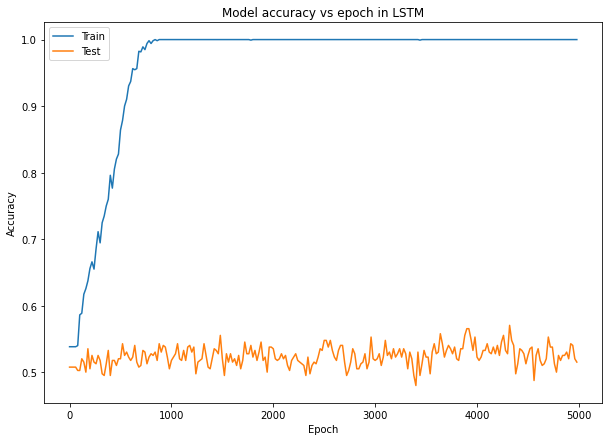

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,7))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Model accuracy vs epoch in LSTM")

ax.plot([i*20 for i in range(len(test_scores))][:1000], train_scores[:1000],  label="Train",
        )
ax.plot([i*20 for i in range(len(test_scores))][:1000], test_scores[:1000], label="Test",
        )
ax.legend()
plt.show()

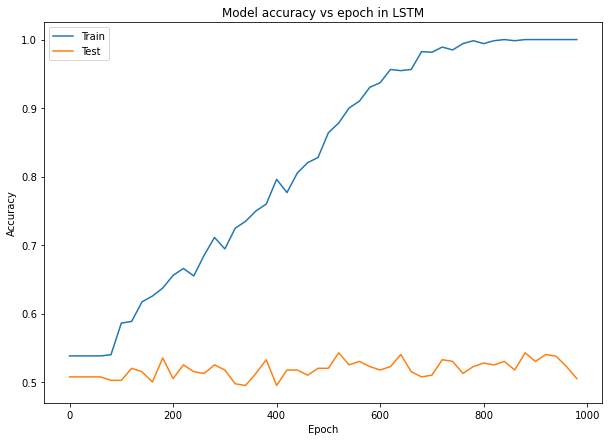

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,7))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Model accuracy vs epoch in LSTM")

ax.plot([i*20 for i in range(len(test_scores))][:50], train_scores[:50],  label="Train",
        )
ax.plot([i*20 for i in range(len(test_scores))][:50], test_scores[:50], label="Test",
        )
ax.legend()
plt.show()

In [62]:
validation_metrics(loaded_model, valid_dl)

IndexError: index 1002 is out of bounds for axis 0 with size 397

In [55]:
validation_metrics(model, test_dl)

[array([ 555, 5659, 3459, 7012, 3459, 6127, 3175, 4235,    2, 4658, 2624,
       4827, 7427, 4658, 1728, 7699, 3459, 7012, 3175, 4658,    2, 3459,
       3965,  555, 4827, 4235,  555, 7699, 2240,    2, 5030, 4827, 4658,
       6127,  996,    2,  996, 3175, 2240,    2, 4658, 1728, 5030, 3965,
          2, 4658, 6127, 7012, 4827, 4235,    2, 6127, 6127, 4235, 7427,
       5659, 1728, 2240, 5659, 3459, 4235, 4235, 3459, 2954, 5659,    2,
       4658, 7012, 6127, 4658, 4827, 7012,  996, 3175,    2, 5659, 2954,
       2240, 1728, 7699, 3459, 7012, 3175, 7012, 2240, 5659, 5659, 4827,
       5659, 3459, 6127, 4235, 3459, 6127, 5659,    2, 2240, 3965, 4235,
       7427])
 100]
[array([4658,    2, 6127,    2, 4827, 2624, 2624, 3459,  996, 3459,    2,
       3965, 3965, 7955,    2, 4658, 4658, 4827, 7427, 4658,  996, 2240,
       6127, 4235,    2, 4658, 4658, 2240, 1728, 4235,    2, 5659, 6127,
       4235, 3459, 6127, 6127, 3459, 4827, 4658, 7012, 2240, 6127, 7012,
       3965,    2, 7427, 4658

<ipython-input-35-04086b75a05f>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


(0.6931648254394531,
 tensor(0.5075),
 {'precision': 0.5075376629829407,
  'recall': 1.0,
  'f_measure': 0.6733333468437195,
  'accuracy': 0.5075376629829407})

In [103]:
import json
with open('loss.json', 'w') as f:
    json.dump(loss_list_1, f)

In [106]:
with open('loss.json') as json_file:
    data_1 = json.load(json_file)
for i in data_1:
    print(i)

0.6902965294724247
0.6900661579707807
0.6905699993861413
0.6904530341038676
0.6903910675437184
0.6903018572568693
0.690338815940117
0.6901696411928743
0.6902827410814043
0.6902182319902953
0.6900857369205113
0.6903348610643376
0.6904774117529843
0.6901237890562223
0.6901296127953518
0.690442662745539
0.6901034479577636
0.6901989041207519
0.690379034912356
0.6900022571873605
0.69014317167596
0.6897534566902493
0.6901842740580978
0.6898756349016697
0.6905046224994483
0.6895912829614507
0.690055412769718
0.6902690462761822
0.6902859497230459
0.6905102436528499
0.6900042660790867
0.6901754464650734
0.6902089914186575
0.6903915166554583
0.6902407106484414
0.6898044553952093
0.6901809267393187
0.6905421699224451
0.6905674508496756
0.6909086808349584
0.6905142868095642
0.6905491040795917
0.6898676445261958
0.690101034845453
0.6896838406171246
0.690047091090509
0.6900938027151285
0.6895405393403483
0.6897022835753926
0.6898265279810735
0.6892174481344664
0.6896745479477243
0.6893269690918782
0

0.01223441289845732
0.014511470000261924
0.007821475615643596
0.03084177690879524
0.010983795953537615
0.022941438798690223
0.026641801830481246
0.009679859877883838
0.023221164618053423
0.012344269067874784
0.016304241055442845
0.018394384042091674
0.02225529644591382
0.02077103139852947
0.010703481524231851
0.012299162366190546
0.018300392531252627
0.02355999409711406
0.007149221171491242
0.0127736994829326
0.012501552022444623
0.006706804195051429
0.007827569936237146
0.015086615646193876
0.015596303295916514
0.008717267097644102
0.014359422452672754
0.021978785863691997
0.010346359555319415
0.019111449881843864
0.016048381780684746
0.02184169650027774
0.02098585469108685
0.012427750001344783
0.011768156392022805
0.011618681241446162
0.013103439389922719
0.018804777932832663
0.01823010949334278
0.0144853907923498
0.013950610986897467
0.018021099616583408
0.012766183091219636
0.011675995190437854
0.006871395391129789
0.01774409170458789
0.017327086996884532
0.016635805421597212
0.017

In [141]:
validation_metrics(model, test_dl)

<ipython-input-129-866c844d4231>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-39-56944e8b7951>:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.fc2(hidden))


tensor(2733.)
tensor(2397.)
tensor(2035.)
tensor(2382.)


(1.3179874359106685,
 tensor(0.4994),
 {'precision': 0.5327485203742981,
  'recall': 0.5343108773231506,
  'f_measure': 0.5335285663604736,
  'accuracy': 0.49942389130592346})

In [137]:
validation_metrics(model, test_dl)

<ipython-input-129-866c844d4231>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-39-56944e8b7951>:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.fc2(hidden))


tensor(2831.)
tensor(2478.)
tensor(1954.)
tensor(2284.)


(1.3007696449063617,
 tensor(0.5012),
 {'precision': 0.5332454442977905,
  'recall': 0.5534701943397522,
  'f_measure': 0.5431696176528931,
  'accuracy': 0.5012045502662659})

In [132]:
validation_metrics(model, test_dl)

<ipython-input-129-866c844d4231>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-39-56944e8b7951>:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.fc2(hidden))


tensor(2854.)
tensor(2514.)
tensor(1918.)
tensor(2261.)


d:\victoria\data mining\ass\ass1\venv\lib\site-packages\torch\nn\modules\loss.py:516: UserWarning: Using a target size (torch.Size([547])) that is different to the input size (torch.Size([547, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


(1.1928177812629637,
 tensor(0.4998),
 {'precision': 0.5316691398620605,
  'recall': 0.5579667687416077,
  'f_measure': 0.5445006489753723,
  'accuracy': 0.49984288215637207})

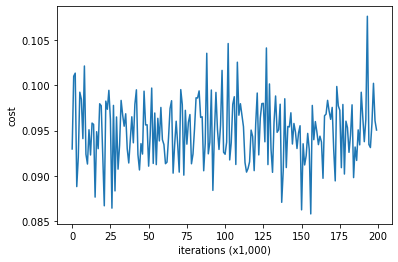

In [161]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(loss_list)
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

In [ ]:
len(news[news['Label']==0])

In [20]:
len(news[news['Label']==1])

24959

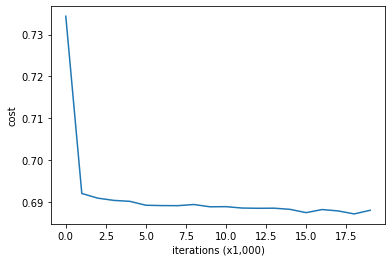

In [134]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(loss_list[:20])
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

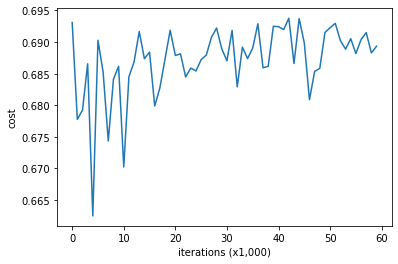

In [130]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(f_list)
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

* https://medium.com/@martinpella/how-to-use-pre-trained-word-embeddings-in-pytorch-71ca59249f76